In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Dummy Data HSS.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


The dataset contains 5 variables :  
**TV** = TV promotion budget in millions  
**Radio** = Radio promotion budget in millions  
**Social Media** = Social Media promotion budget in millions   
**Influencer** = type of influencers based on number of followers : Nano (with 1K-5K), Micro (5K-25K), Macro (100K-500K) and Mega (+1M)   
**Sales** in million

In [ ]:
data.shape

(4572, 5)

In [ ]:
data.dtypes

,0
TV,float64
Radio,float64
Social Media,float64
Influencer,object
Sales,float64


In [ ]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


All the variables have their count number < 4572 which means there may be an existence of null values.

In [ ]:
data['Influencer'].value_counts()

,count
Influencer,
Mega,1158
Micro,1153
Nano,1139
Macro,1122


In [ ]:
data.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [3]:
# Replacing the null values with the mean :
data['Sales'] = data['Sales'].fillna(data['Sales'].mean())
data['TV'] = data['TV'].fillna(data['TV'].mean())
data['Radio'] = data['Radio'].fillna(data['Radio'].mean())
data['Social Media'] = data['Social Media'].fillna(data['Social Media'].mean())

In [4]:
data.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


No more null values. Now we can proceed with our analysis.

In [ ]:
data.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.096461,9.672723,2.211218,93.071947
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.546519,1.529879,112.397660
50%,53.000000,17.875181,3.057150,189.632530
75%,77.000000,25.647476,4.805832,272.414914
max,100.000000,48.871161,13.981662,364.079751


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Social Media'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

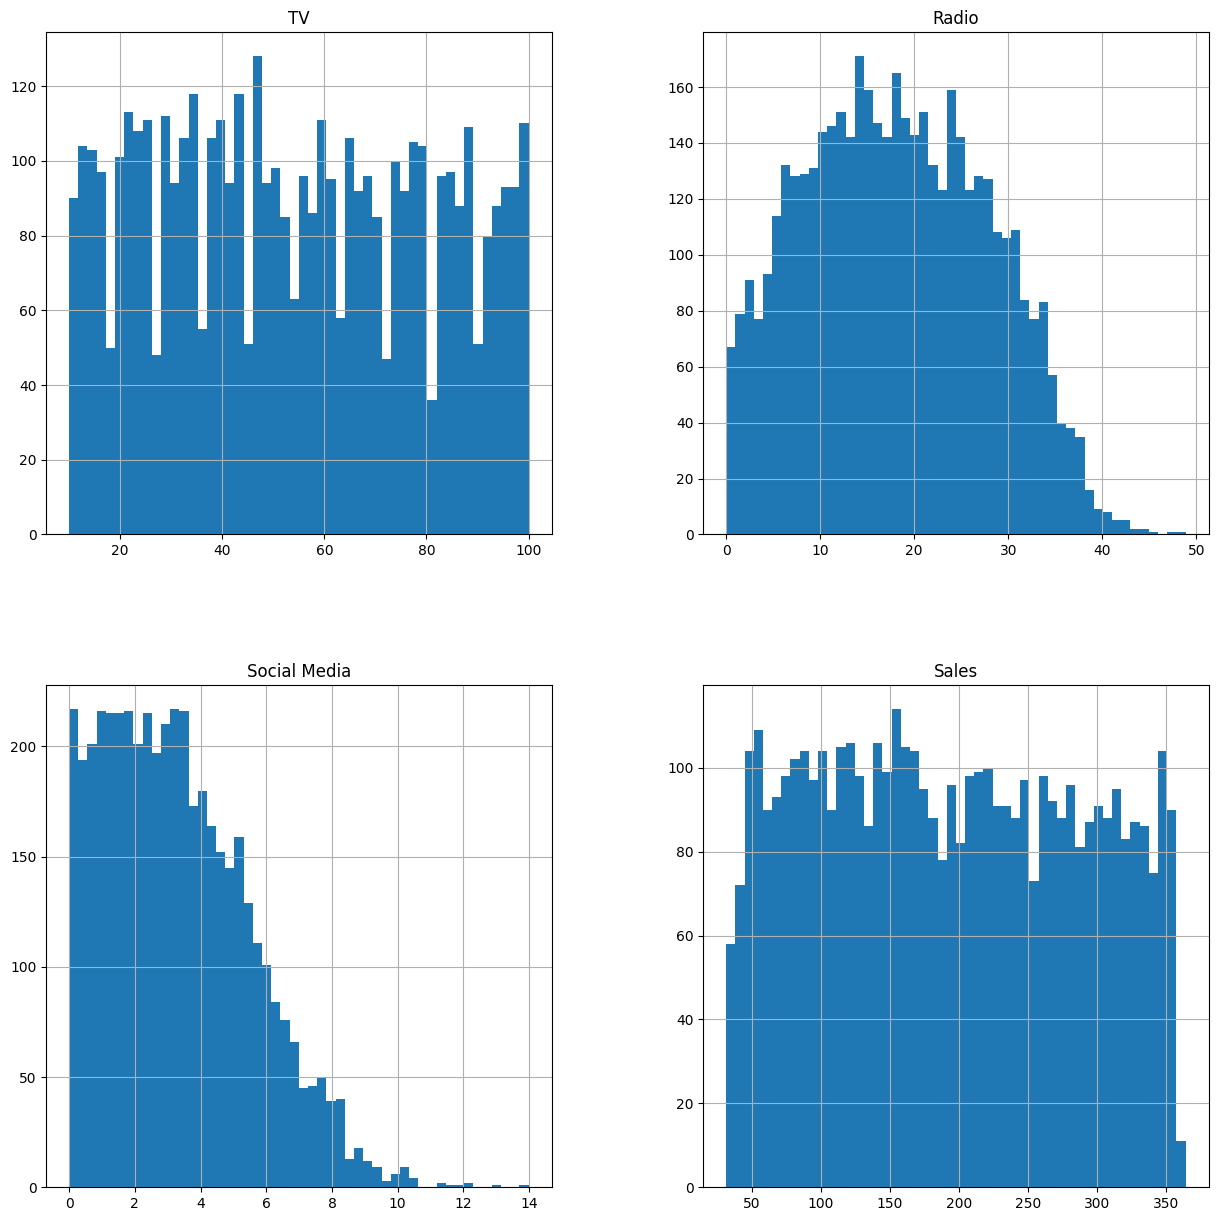

In [ ]:
data.hist(bins=50,figsize=(15,15))

In [15]:
import plotly.express as px

fig = px.scatter(data, x='Social Media', y ='Sales', color = 'Influencer', title= '', opacity =0.8,  width=800, height=800 )
fig.show()

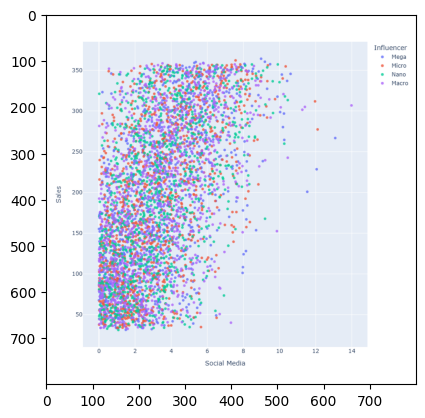

In [16]:
from matplotlib import image as mpimg

image = mpimg.imread("/content/newplot (4).png")
plt.imshow(image)
plt.show()

Based on this scatter plot, we can'ts say much about the correlation between Social Media & Promotion Budget.

In [ ]:
fig = px.scatter(data, x='TV', y ='Sales', title= 'Sales by TV Promotion', opacity =0.8,  width=800, height=800 )
fig.show()

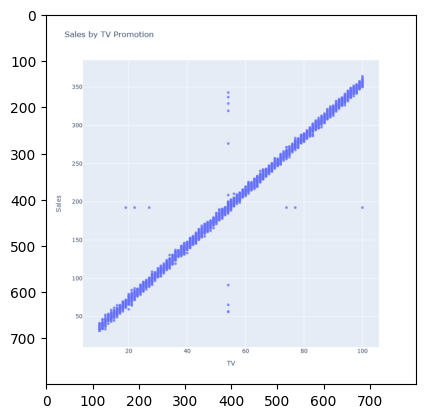

In [11]:
image = mpimg.imread("/content/newplot (3).png")
plt.imshow(image)
plt.show()

Sales and TV Promotion Budget are highly correlated.

In [17]:
fig = px.scatter(data, x='Radio', y ='Sales', title= 'Sales by Radio Promotion', opacity =0.8,  width=800, height=800 )
fig.show()

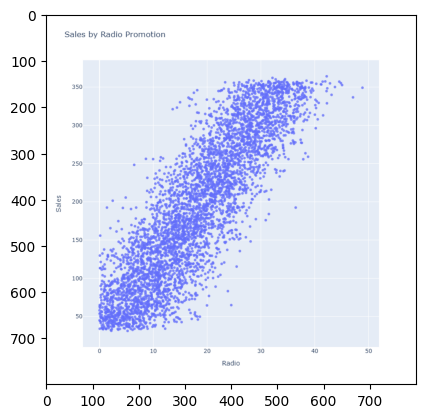

In [18]:
from matplotlib import image as mpimg

image = mpimg.imread("/content/newplot (5).png")
plt.imshow(image)
plt.show()

Same thing for Radio Promotion Budget and Sales, they are highly correlated.

<Axes: >

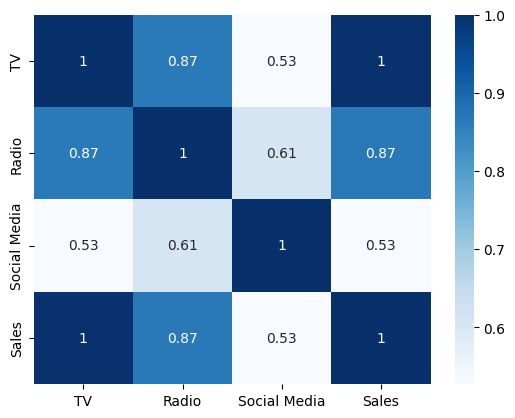

In [ ]:
# Correlation Matrix :
matrix = data.corr(numeric_only = True)
sns.heatmap(matrix, annot=True, cmap = 'Blues')

In [ ]:
# Splitting data :
from sklearn.model_selection import train_test_split

X = data.drop(['Sales'],axis=1)
Y = data['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3200, 4), (1372, 4), (3200,), (1372,))

## **Linear Regression**

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train[['TV','Radio','Social Media']], Y_train)
print('Coefficients: ',lr.coef_, 'Intercept :', lr.intercept_)

# Variance score: (1 means perfect prediction)
print('Variance score: {}'.format(lr.score(X_test[['TV','Radio','Social Media']], Y_test)))

Coefficients:  [3.51104544 0.1236306  0.06325351] Intercept : 0.15981027637033662
Variance score: 0.9924248360080782


Based on the Linear Regression results we conclude that :    

- An increase in TV Promotion budget leads to Sales **tripling** in quantity.

- Radio variable has a smaller coefficient 0.12, suggesting that it has a minor influence on Sales; while TV and Social Media variables are constant an increase in Radio Promotion Budget increases Sales by 0.12.   

- Social Media : This variable has the smallest coefficient 0.06, indicating that it has the least effect on Sales; one-unit increase in Social Media Promotion Budget leads to an increase of 0.06 in Sales (while other variables are held constant).

- Since the intercept is equal to 0.16, average Sales is 0.16M (160K) when all the predictor variables in the model are equal to zero.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

Y_pred = lr.predict(X_test[['TV','Radio','Social Media']])
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

lr_acc = lr.score(X_test[['TV','Radio','Social Media']], Y_test)
print('Accuracy :', lr_acc)

MSE: 66.01410723816497
R2: 0.9924248360080782
Accuracy : 0.9924248360080782


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10,  criterion = 'squared_error',  random_state =7)
rf.fit(X_train[['TV','Radio','Social Media']], Y_train)

RandomForestRegressor(n_estimators=10, random_state=7)

In [ ]:
Y_pred = rf.predict(X_test[['TV','Radio','Social Media']])
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

rf_acc = rf.score(X_test[['TV','Radio','Social Media']], Y_test)
print('Accuracy :', rf_acc)

MSE: 93.51101905025126
R2: 0.9892695465561359
Accuracy : 0.9892695465561359


## **Neural Networks**

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['TV','Radio','Social Media']])
X_test_scaled = scaler.transform(X_test[['TV','Radio','Social Media']])

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train[['TV','Radio','Social Media']].shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train[['TV','Radio','Social Media']], Y_train, epochs=100, batch_size=10, verbose=1)

Y_pred = model.predict(X_test[['TV','Radio','Social Media']])

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20096.6016
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.9510
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62.1149
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.8447
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.5321
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39.5094
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65.3694
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.8837
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.9949
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.0181
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73.9245
Epoch 12/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42.1653
Epoch 13/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65.3947
Epoch 14/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.2949
Epoch 15/100
320/320 ━━━━━━━━━━━━━━━━━

## **XG Boost**

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

xgb_model.fit(X_train[['TV','Radio','Social Media']], Y_train)

Y_pred = xgb_model.predict(X_test[['TV','Radio','Social Media']])

mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)

r2 = r2_score(Y_test, Y_pred)
print('R2:', r2)

MSE: 92.94673804370788
R2: 0.9893342981878844


## **Comparing Models :**

In [ ]:
models = ["Linear Regression", "Random Forest", "Neural Networks","XGBoost"]
mse = [66.01410723816497 ,93.51101905025126,66.02375185485107,92.94673804370788]
R2 = [0.9924248360080782,0.9892695465561359,0.9923589620816422,0.9893342981878844]
d = pd.DataFrame({'Model':models, 'MSE':mse, 'R2':R2})

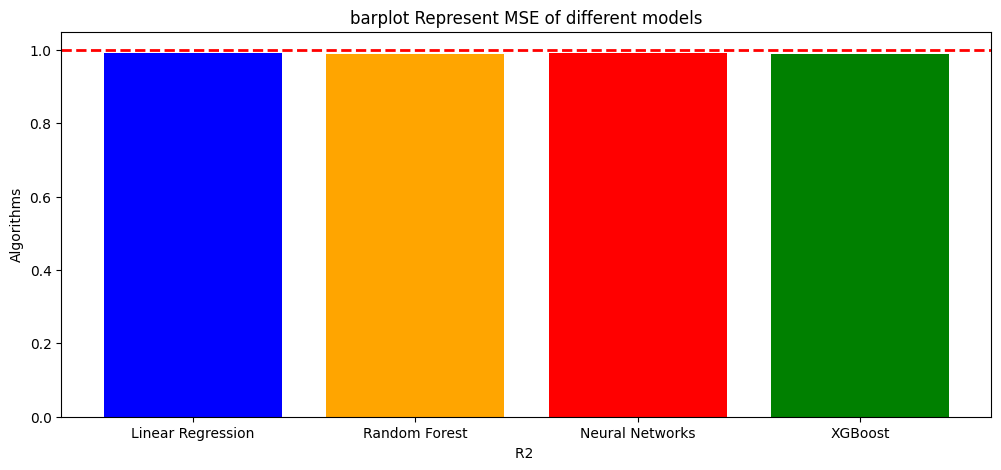

In [ ]:
colors = ['blue','orange','red','green']
plt.figure(figsize=(12,5))
plt.title("barplot Represent MSE of different models")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2)
plt.xlabel("R2 ")
plt.ylabel("Algorithms")
plt.bar(d['Model'],d['R2'],color = colors)
plt.show()

Linear Regression and Neural Networks with higher accuracy values give the best performance.

This Data project can help companies and marketers choose the best and most profitable marketing strategy to invest their promotion budget in and achieve significant sales